In [1]:
# !pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers, models
from keras.models import Sequential

In [3]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [10]:
len(roses)

641

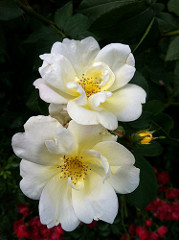

In [11]:
PIL.Image.open(str(roses[0]))

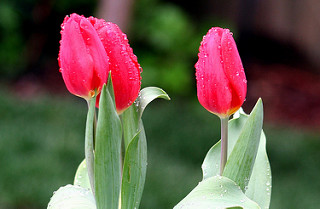

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [15]:
flowers_images_dict ={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [21]:
flowers_images_dict['dandelion']

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/1074999133_1e4a1e042e.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10777398353_5a20bb218c.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10778387133_9141024b

In [47]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [48]:
img = cv2.imread(flowers_images_dict['roses'][0])
img.shape

(240, 179, 3)

In [49]:
img = cv2.imread(flowers_images_dict['roses'][0])
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [50]:
#Let's `resize` the images from the default sizes to 180*180
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [51]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
#     print(f'{flower_name} :', len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [52]:
y[:5]

[0, 0, 0, 0, 0]

In [54]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [55]:
X = np.array(X)
y = np.array(y)

In [57]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [66]:
len(X_train)

2752

In [67]:
len(X_test)

918

In [68]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [73]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10 )

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.3183 - loss: 1.7324
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 370ms/step - accuracy: 0.5503 - loss: 1.0827
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 369ms/step - accuracy: 0.6773 - loss: 0.8604
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 377ms/step - accuracy: 0.7891 - loss: 0.6193
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 372ms/step - accuracy: 0.8584 - loss: 0.4148
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 409ms/step - accuracy: 0.9169 - loss: 0.2502
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.9407 - loss: 0.1638
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 369ms/step - accuracy: 0.9788 - loss: 0.0942
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 376ms/step - accuracy: 0.9818 - loss: 0.0689
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 370ms/step - accuracy: 0.9825 - loss: 0.0752


In [74]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.5863 - loss: 2.1297


[2.2025563716888428, 0.584967315196991]

In [75]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step


array([[  3.1645494 ,  14.242004  ,  -0.0748502 , -16.296057  ,
         -3.5012906 ],
       [  6.9269834 ,   2.922523  ,  -8.585939  ,  -7.559568  ,
          7.337689  ],
       [ -1.1507667 ,   3.3208349 ,  10.158854  ,  -8.582389  ,
         -6.197141  ],
       ...,
       [  0.33085975,   0.84113955,  -6.9847875 ,   3.4703288 ,
          2.7673464 ],
       [  5.3219132 ,  -1.3031554 ,   6.9595327 ,  -2.4587786 ,
         -6.5382786 ],
       [ -0.29036853, -10.867636  ,  -1.0221018 ,   4.608214  ,
          6.912973  ]], dtype=float32)

In [77]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.5456644e-05, 9.9998391e-01, 6.0570642e-07, 5.4636339e-14,
       1.9686915e-08], dtype=float32)>

In [78]:
np.argmax(score)

1

In [79]:
y_test[0]

1

###### Let's apply `data_augmentation` since the prediction has an output of 65%, owing to the fact that it's overfitting


In [135]:
data_augmentation = keras.Sequential([
#     layers.RandomContrast(0.4)
    layers.Input(shape=(180,180,3)),
    
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
])

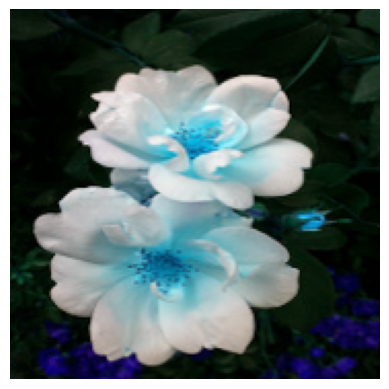

In [136]:
plt.axis('off')
plt.imshow(X[0]);

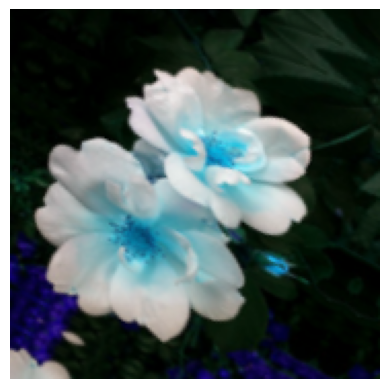

In [137]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [138]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10 )

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 319ms/step - accuracy: 0.3371 - loss: 1.6661
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 335ms/step - accuracy: 0.5592 - loss: 1.1066
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 411ms/step - accuracy: 0.6332 - loss: 0.9639
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 430ms/step - accuracy: 0.6542 - loss: 0.9184
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.6622 - loss: 0.8552
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 359ms/step - accuracy: 0.6788 - loss: 0.8350
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 365ms/step - accuracy: 0.7114 - loss: 0.7756
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.7299 - loss: 0.7005
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 407ms/step - accuracy: 0.7297 - loss: 0.6900
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 347ms/step - accuracy: 0.7508 - loss: 0.6582


In [139]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6794 - loss: 0.7918


[0.8126457929611206, 0.6971677541732788]